<a href="https://colab.research.google.com/github/wordsbyanmol/PUS2024_AArora/blob/main/Class_Oct15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import missingno as msno

In [3]:
student_res= pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2024/refs/heads/main/data/StudentPerformanceFactors_modified.csv")

In [4]:
student_res.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19.0,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,24.0,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0
3,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,NaN,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0


In [5]:
student_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6527 non-null   float64
 1   Attendance                  6521 non-null   float64
 2   Parental_Involvement        6607 non-null   object 
 3   Access_to_Resources         6607 non-null   object 
 4   Extracurricular_Activities  6607 non-null   object 
 5   Sleep_Hours                 6526 non-null   float64
 6   Previous_Scores             6528 non-null   float64
 7   Motivation_Level            6607 non-null   object 
 8   Internet_Access             6607 non-null   object 
 9   Tutoring_Sessions           6523 non-null   float64
 10  Family_Income               6607 non-null   object 
 11  Teacher_Quality             6529 non-null   object 
 12  School_Type                 6607 non-null   object 
 13  Peer_Influence              6607 

In [14]:
student_res.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6527.000000,6521.000000,6526.000000,6528.000000,6523.000000,6518.000000,6525.000000
mean,19.984832,79.990799,7.028042,75.067096,1.493791,2.966247,67.240307
std,5.993324,11.546369,1.469583,14.397116,1.231580,1.031094,3.882296
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


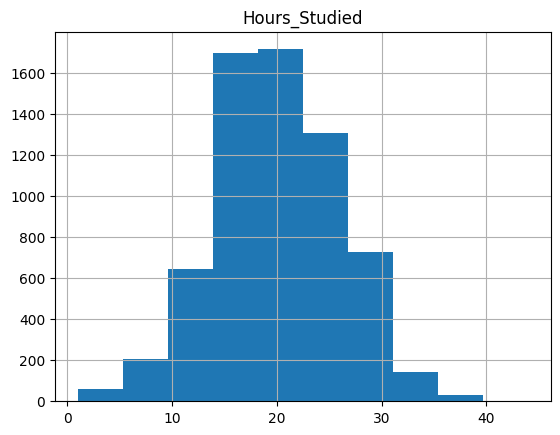

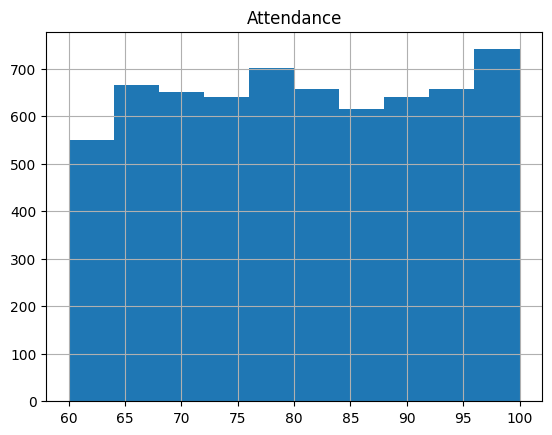

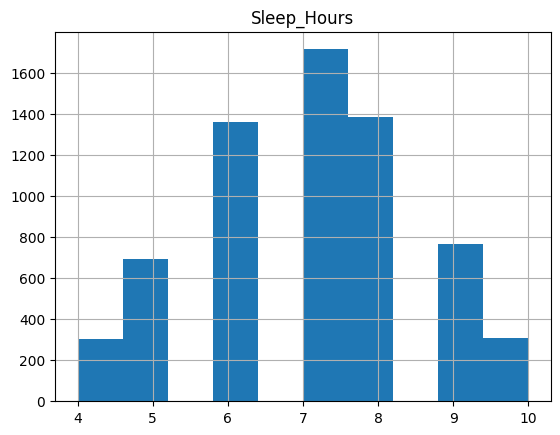

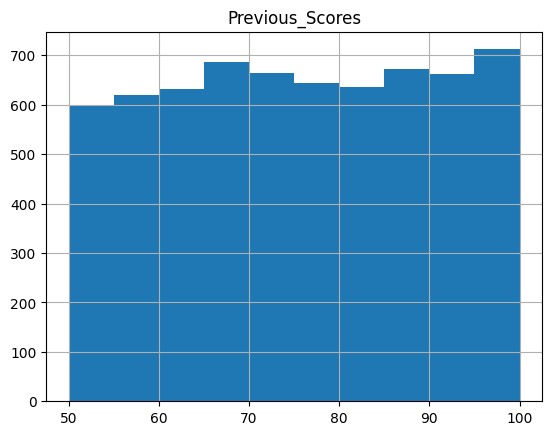

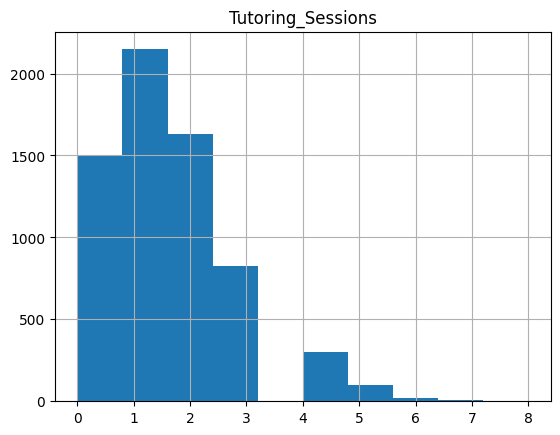

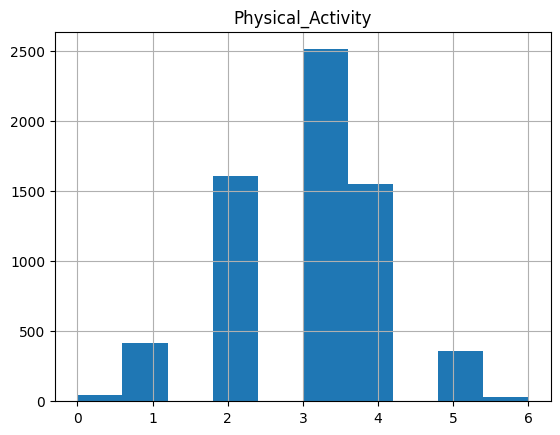

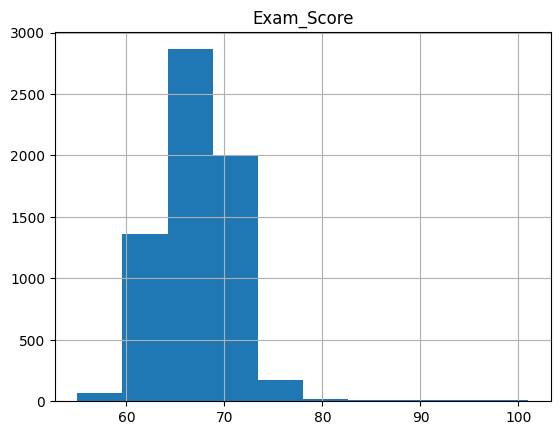

In [15]:
for c in student_res.select_dtypes("number").columns:
  student_res[[c]].hist()

In [11]:
ohe_parentalinvolvelment= pd.get_dummies(student_res['Parental_Involvement'])

In [13]:
student_res.merge(ohe_parentalinvolvelment, left_index=True, right_index=True).drop(columns=['Parental_Involvement'])

,Hours_Studied,Attendance,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,High,Low,Medium
0,23.0,84.0,High,No,7.0,73.0,Low,Yes,0.0,Low,...,Positive,3.0,No,High School,Near,Male,67.0,False,True,False
1,19.0,64.0,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,...,Negative,4.0,No,College,Moderate,Female,61.0,False,True,False
2,24.0,98.0,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,...,Neutral,4.0,No,Postgraduate,Near,Male,74.0,False,False,True
3,29.0,89.0,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,...,Negative,4.0,No,High School,Moderate,Male,71.0,False,True,False
4,NaN,92.0,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,...,Neutral,4.0,No,College,Near,Female,70.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,Medium,No,7.0,76.0,Medium,Yes,1.0,High,...,Positive,2.0,No,High School,Near,Female,68.0,True,False,False
6603,23.0,76.0,Medium,No,8.0,81.0,Medium,Yes,3.0,Low,...,Positive,2.0,No,High School,Near,Female,69.0,True,False,False
6604,NaN,90.0,Low,Yes,6.0,65.0,Low,Yes,3.0,Low,...,Negative,2.0,No,Postgraduate,Near,Female,68.0,False,False,True
6605,10.0,86.0,High,Yes,6.0,91.0,High,Yes,2.0,Low,...,Positive,3.0,No,High School,Far,Female,68.0,True,False,False


In [32]:
student_res.dropna(axis=1)

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,School_Type,Peer_Influence,Learning_Disabilities,Gender
0,Low,High,No,Low,Yes,Low,Public,Positive,No,Male
1,Low,Medium,No,Low,Yes,Medium,Public,Negative,No,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Public,Neutral,No,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Public,Negative,No,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,Public,Neutral,No,Female
...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Public,Positive,No,Female
6603,High,Medium,No,Medium,Yes,Low,Public,Positive,No,Female
6604,Medium,Low,Yes,Low,Yes,Low,Public,Negative,No,Female
6605,High,High,Yes,High,Yes,Low,Private,Positive,No,Female


In [36]:
student_res.fillna(student_res.mean())

TypeError: can only concatenate str (not "int") to str

In [44]:
np.random.seed(302)
data= np.random.rand(1000)
print("meand: {.2} std: {:.2}".format(data.mean(), data.std()))

AttributeError: 'numpy.float64' object has no attribute '2'